# Détection des croisements de potentiel - Potentiels évités

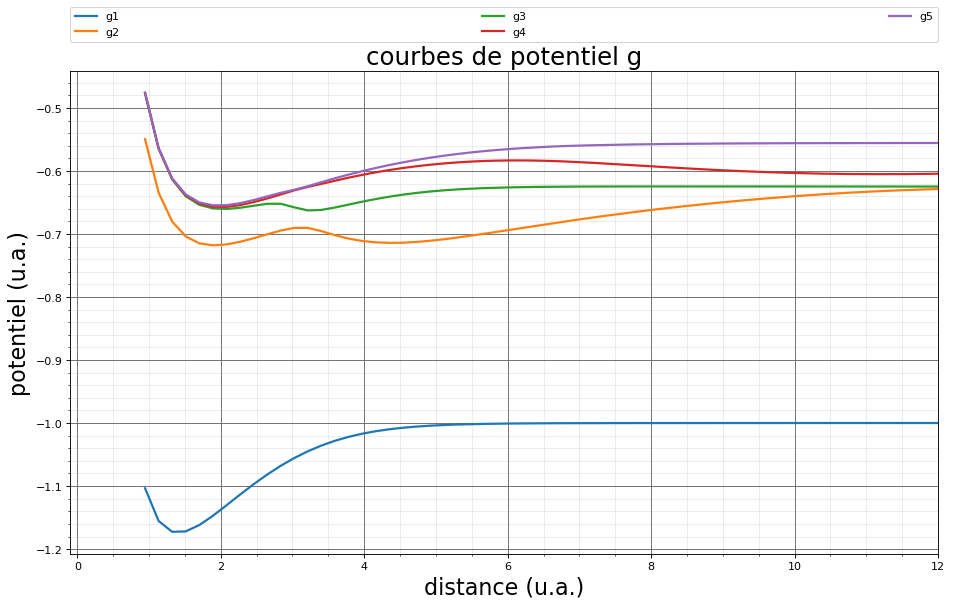

In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from textwrap import wrap
#############################################################################
# ouverture des fichiers et lecture des données
with open ("pec_sigmag.txt", "r") as fichierg: # ouverture du fichier pec_sigmag.txt en mode lecture
    fichierg = open("pec_sigmag.txt", "r")
echelle=1/0.529177
data_g = np.loadtxt(fichierg)
xg_read = data_g[:,0]*echelle
with open ("pec_sigmau.txt", "r") as fichieru: # ouverture du fichier pec_sigmau.txt en mode lecture
    fichieru = open("pec_sigmau.txt", "r")
data_u = np.loadtxt(fichieru)
xu_read = data_u[:,0]*echelle
#########################################################################
# création des fonctions Vgi(x) et Vui(x) qui sont inexées et interpolent les potentiels Vgi et Vui
g1=interp1d(xg_read, data_g[:,1], kind='cubic')
g2=interp1d(xg_read, data_g[:,2], kind='cubic')
g3=interp1d(xg_read, data_g[:,3], kind='cubic')
g4=interp1d(xg_read, data_g[:,4], kind='cubic')
g5=interp1d(xg_read, data_g[:,5], kind='cubic')
Vg = [g1,g2,g3,g4,g5]

g6=interp1d(xu_read, data_u[:,1], kind='cubic')
g7=interp1d(xu_read, data_u[:,2], kind='cubic')
g8=interp1d(xu_read, data_u[:,3], kind='cubic')
g9=interp1d(xu_read, data_u[:,4], kind='cubic')
g10=interp1d(xu_read, data_u[:,5], kind='cubic')
Vu = [g6,g7,g8,g9,g10]
#############################################################################
# impressions et plot
figure(figsize=(14,8), dpi=80)
rcParams['axes.labelsize'] = 20
# Lignes d'unités principales
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Lignes de subdivision
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
xlabel("distance (u.a.)")
ylabel("potentiel (u.a.)")
plt.xlim(-0.1,12)
for ip in range(1,6):
    plt.plot(xg_read, data_g[:,ip],linewidth=2.0, label="g%d"%(ip,))
    #plt.plot(xu_read, data_u[:,ip],linewidth=0.5, label="u%d"%(ip,))
plt.title ("courbes de potentiel g", fontsize=22)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .106), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()



Les encarts suivants déterminent les croisements évités en effectuant une trajectoire sur l'une des courbes de potentiel et en estimant le changement de signe de la différence d'évergie entre ce potentiel et une autre courbe de type g.

La formule de Landau-Zener s'écrit:
$$exp~{\left[{-\frac{\pi}{2}}\cdot\sqrt{~\frac{ \left|~\Delta V_{ce}~\right|^3}{ \left|~3\frac{d^2\Delta V_{ce}}{dt^2}~\right|}}\right]}$$

où $\Delta V_{ce}$ désigne la différence entre les potentiels des deux courbes au droit du croisement évité.

Pour être en mesure de calculer la probabilité de Landau-Zener, il faut calculer la dérivée seconde de la différence entre les potentiels des courbes au droit du croisement évité.

Cette dérivée seconde est calculée par la formule aux différences finies:
$$f"(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$


croisement évité à t= 239.24  x= 4.898142522500679 accélération 0.007818178956703153 Landau-Zener 0.7990571293247111
croisement évité à t= 242.4  x= 3.2030072567458916 accélération -0.09656143956385882 Landau-Zener 0.986656294268344
croisement évité à t= 247.2  x= 0.9620159564851402 accélération 0.007685470459556542 Landau-Zener 0.8173402861824394
croisement évité à t= 251.88  x= 3.2088264485306985 accélération -0.10489381540206728 Landau-Zener 0.9871912675656203
croisement évité à t= 254.94  x= 4.899719547411351 accélération 0.008291491319467154 Landau-Zener 0.8042652846944496


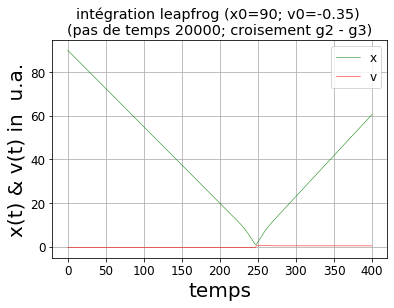

In [15]:
x0=90 
v0=-0.35
Potentiel=g2
Potentiel1=g3

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 20000    
tps=400
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 
x,v = resoudre(x0,v0,Mm,Potentiel)
###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))


###############################################################################
show()


In [14]:
x0=90 
v0=-0.35
Potentiel=g2
Potentiel1=g4

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=400
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]
texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
print(texte1)
print(texte2)

###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
###############################################################################  
x,v = resoudre(x0,v0,Mm,Potentiel)


{'Potentiel', 'g2'}
{'g4', 'Potentiel1'}
croisement évité à t= 62.16  x= 68.24181963048221 accélération -1.8393410173518642e-09 Landau-Zener 7.457035481886637e-169
croisement évité à t= 93.04  x= 57.432731431574986 accélération 1.955960496481668e-09 Landau-Zener 9.14112366792142e-164
croisement évité à t= 221.76  x= 12.353602870730137 accélération -0.00045022627774746356 Landau-Zener 0.8523530142002803
croisement évité à t= 239.16  x= 4.939182714654641 accélération 0.007093249674685976 Landau-Zener 0.6366934225828994
croisement évité à t= 243.44  x= 2.6714853023050518 accélération -0.006347308155826187 Landau-Zener 0.8569513417025437
croisement évité à t= 247.2  x= 0.9537707593340642 accélération 0.00925488354598669 Landau-Zener 0.8300988992325606
croisement évité à t= 250.8  x= 2.6818123322543075 accélération -0.007843739818530367 Landau-Zener 0.8703447536558013
croisement évité à t= 254.8  x= 4.93651927488645 accélération 0.00804523621830697 Landau-Zener 0.6544782773737049
croisement

In [13]:
x0=90 
v0=-0.35
Potentiel=g2
Potentiel1=g5

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=400
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]
texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
print(texte1)
print(texte2)

###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 
x,v = resoudre(x0,v0,Mm,Potentiel)


{'Potentiel', 'g2'}
{'g5', 'Potentiel1'}
croisement évité à t= 0.48  x= 89.83198319824511 accélération 3.832992291237715e-07 Landau-Zener 2.2344122887601815e-12
croisement évité à t= 1.24  x= 89.5659565952888 accélération -1.0463699761811808e-06 Landau-Zener 8.881409678311865e-08
croisement évité à t= 2.0  x= 89.29992999219084 accélération 4.815058730627119e-07 Landau-Zener 4.026984819114846e-11
croisement évité à t= 2.84  x= 89.00590058817696 accélération -7.824108386164541e-07 Landau-Zener 7.003257944644145e-09
croisement évité à t= 3.56  x= 88.7538753844236 accélération 3.0807425383021643e-07 Landau-Zener 1.0100458326185189e-13
croisement évité à t= 4.16  x= 88.54385438108582 accélération -6.23733838183392e-08 Landau-Zener 1.312403123322413e-29
croisement évité à t= 4.56  x= 88.4038403786657 accélération 2.991091920752919e-08 Landau-Zener 1.962453831887835e-42
croisement évité à t= 128.96  x= 44.85946190200317 accélération -3.297812944624834e-09 Landau-Zener 2.5573221114700027e-126


croisement évité à t= 238.86  x= 11.195366243114801 accélération -0.0002748893959493798 Landau-Zener 0.8605205539241276
croisement évité à t= 255.66  x= 5.657835517162459 accélération 0.00041357806895148455 Landau-Zener 0.6715461949176315
croisement évité à t= 259.02  x= 4.484822499343104 accélération -0.00034131081321388414 Landau-Zener 0.6527466599294152
croisement évité à t= 260.97  x= 3.729396751631371 accélération 0.0016646364537310874 Landau-Zener 0.8219514206930766
croisement évité à t= 267.96  x= 1.142055544738026 accélération -0.0009550418402190762 Landau-Zener 0.9995399873012707
croisement évité à t= 274.74  x= 3.7278904205726677 accélération 0.0018259195008010945 Landau-Zener 0.8292663768298127
croisement évité à t= 276.6  x= 4.480383247532491 accélération -0.0003749895121390059 Landau-Zener 0.6656708775246012
croisement évité à t= 279.81  x= 5.659123034587023 accélération 0.000460803121552177 Landau-Zener 0.6857665991411412
croisement évité à t= 295.71  x= 11.19399501416979

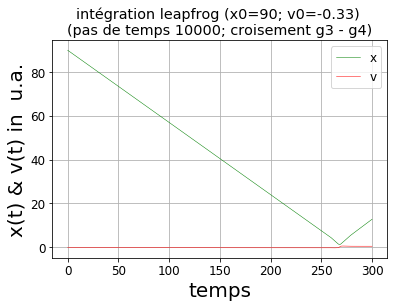

In [12]:
x0=90 
v0=-0.33
Potentiel=g3

Potentiel1=g4
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=300
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 


x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))


###############################################################################
show()



{'g4', 'Potentiel'}
{'g5', 'Potentiel1'}
croisement évité à t= 0.595  x= 89.82148213962108 accélération 3.1846390558165047e-07 Landau-Zener 0.9999003322305235
croisement évité à t= 1.4  x= 89.57995794955823 accélération -7.690693062956058e-07 Landau-Zener 0.9999363319216968
croisement évité à t= 2.38  x= 89.28592845981396 accélération 3.409581436259915e-07 Landau-Zener 0.9999034088079582
croisement évité à t= 3.29  x= 89.01290103556175 accélération -5.669622286908698e-07 Landau-Zener 0.999925544589629
croisement évité à t= 4.27  x= 88.71887145670478 accélération 1.336897879433506e-07 Landau-Zener 0.999845542933522
croisement évité à t= 4.62  x= 88.6138608813774 accélération -9.618453078135003e-08 Landau-Zener 0.9998179622132548
croisement évité à t= 48.65  x= 75.40347258379585 accélération 3.236672277787293e-09 Landau-Zener 0.9989616020857077
croisement évité à t= 133.84  x= 49.843625063060635 accélération -5.322658630165269e-09 Landau-Zener 0.9994777371926087
croisement évité à t= 250

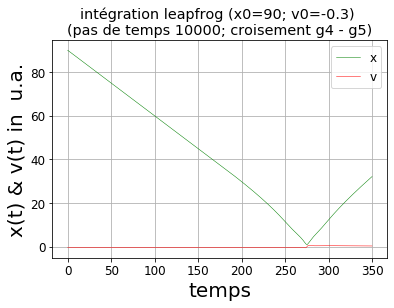

In [11]:
x0=90 
v0=-0.3
Potentiel=g4

Potentiel1=g5
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=350
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)

texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
print(texte1)
print(texte2)

###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 

x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))


###############################################################################
show()


croisement évité à t= 0.595  x= 89.82148213962108 accélération 3.1846390558165047e-07 Landau-Zener 0.9999003322305235
croisement évité à t= 1.4  x= 89.57995794955823 accélération -7.690693062956058e-07 Landau-Zener 0.9999363319216968
croisement évité à t= 2.38  x= 89.28592845981396 accélération 3.409581436259915e-07 Landau-Zener 0.9999034088079582
croisement évité à t= 3.29  x= 89.01290103556175 accélération -5.669622286908698e-07 Landau-Zener 0.999925544589629
croisement évité à t= 4.27  x= 88.71887145670478 accélération 1.336897879433506e-07 Landau-Zener 0.999845542933522
croisement évité à t= 4.62  x= 88.6138608813774 accélération -9.618453078135003e-08 Landau-Zener 0.9998179622132548
croisement évité à t= 48.65  x= 75.40347258379585 accélération 3.236672277787293e-09 Landau-Zener 0.9989616020857077
croisement évité à t= 133.84  x= 49.843625063060635 accélération -5.322658630165269e-09 Landau-Zener 0.9994777371926087
croisement évité à t= 250.635  x= 11.256239682401647 accélération 

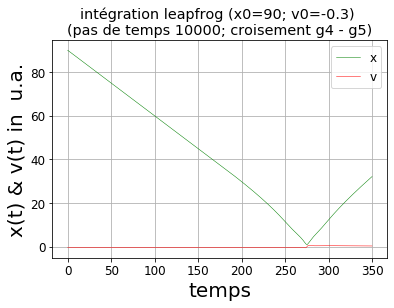

In [10]:
x0=90 
v0=-0.3
Potentiel=g4

Potentiel1=g5
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=350
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 


x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))



###############################################################################
show()

croisement évité à t= 0.595  x= 89.82148216000982 accélération -3.1846363374467304e-07 Landau-Zener 0.999900332187988
croisement évité à t= 1.4  x= 89.5799579408906 accélération 7.690702124188638e-07 Landau-Zener 0.9999363319592041
croisement évité à t= 2.38  x= 89.28592843959937 accélération -3.4095778117668827e-07 Landau-Zener 0.9999034087566189
croisement évité à t= 3.29  x= 89.01290108300098 accélération 5.669620474662183e-07 Landau-Zener 0.9999255445777371
croisement évité à t= 4.27  x= 88.71887159538696 accélération -1.3369033161730545e-07 Landau-Zener 0.9998455432475427
croisement évité à t= 4.62  x= 88.61386109304185 accélération 9.618462139367583e-08 Landau-Zener 0.9998179622989755
croisement évité à t= 48.65  x= 75.40352375771444 accélération -3.2358567668550398e-09 Landau-Zener 0.9989614713109188
croisement évité à t= 133.805  x= 49.853825919140036 accélération 5.337519051597439e-09 Landau-Zener 0.9994784645363393
croisement évité à t= 262.43  x= 11.252762168791612 accélérat

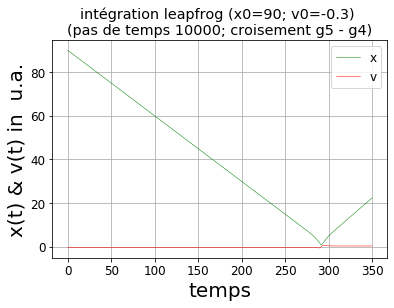

In [16]:
x0=90 
v0=-0.3
Potentiel=g5

Potentiel1=g4
###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 10000    
tps=350
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm, Potentiel):
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
########################
# Intégration "leapfrog"
    k0= derivpot(x0,Potentiel)
    dV=zeros(3)
    v[1] = v[0] - dtp*k0
    x[1] = x[0] + dtp*v[1]
    k0=derivpot(x[1],Potentiel)
    v[2] = v[1] - dtp*k0
    x[2] = x[1] + dtp*v[2]
    k0=derivpot(x[1],Potentiel)
    
    for i in range(2,Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i],Potentiel)          
      
        dV[0]=Potentiel(x[i-2])-Potentiel1(x[i-2])
        dV[1]=Potentiel(x[i-1])-Potentiel1(x[i-1])
        dV[2]=Potentiel(x[i])-Potentiel1(x[i])
        delta=(dV[1]-dV[0])*(dV[2]-dV[1])
        if delta>0:continue
        tcr=tps*(i-1)/Mm
        
        d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
        L_Z=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
        
        print('croisement évité à t=', tcr, ' x=',x[i-1] , 'accélération', d2V, 'Landau-Zener', L_Z)    
    
    return x,v
############################################################################### 


x,v = resoudre(x0,v0,Mm,Potentiel)


###############################################################################
# représentation graphique

texte1 = set(varname for varname, varval in globals().items() if varval is Potentiel)
texte1.discard('Potentiel')
e1 = next(iter(texte1))
texte2 = set(varname for varname, varval in globals().items() if varval is Potentiel1)
texte2.discard('Potentiel1')
e2 = next(iter(texte2))
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20


plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')

xlabel("temps")
express1="x(t) & v(t) in  u.a."
ylabel(express1)

plt.legend(loc='best', frameon= True)

Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
plt.title(Titrea % "\n".join(wrap(Titreb)))

###############################################################################
show()